In [384]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
from scipy.signal import convolve

%run Methods1D.py 
%run io.py 
%run init1D.py

In [621]:
params = { #parameters relevant for the equations
    "Nh":            1000,
    "N0":             200,
    "R0":   np.exp(0.001),
    "M":               50, #Also L, total number of spacers
    "mu":              10, #mutation rate
    "gamma_shape":     20, 
    "Np":             100, #Number of Cas Protein
    "dc":               4, #Required number of complexes to activate defence
    "h":               10, #coordination coeff
    "r":              100, #cross-reactivity kernel
    "beta":         0.001, #spacer sharing coeff
}
sim_params = { #parameters relevant for the simulation (including Inital Valuess)
    "xdomain":                 1000,
    "t0":                         0, 
    "tf":                      1000,
    "noise_mean":                 0,
    "noise_std":                  1,
    "initial_mean":               0,
    "initial_var":                5,
    "conv_size":                  1,
    "exp_ratio":                 10,
}

In [622]:
n = np.zeros(2*sim_params["xdomain"])
nh = np.zeros(2*sim_params["xdomain"])
f = np.zeros(2*sim_params["xdomain"])

In [623]:
n = init_n(n, params, sim_params).astype(int)
nh = init_nh(nh, params, sim_params).astype(int)
f = np.zeros(2*sim_params["xdomain"])

In [624]:
time_range = sim_params["tf"]
frame_n = []
frame_nh = []
frame_f = []

for i in range(time_range):
    f = fitness(n, nh, params, sim_params)
    frame_f.append(f)

    n = virus_growth(n, f, params, sim_params)
    n = mutation(n, params, sim_params)
    frame_n.append(n)

    nh = immunity_gain(nh, n)
    nh = immunity_loss(nh, n)
    frame_nh.append(nh)
    if np.sum(n) > sim_params["exp_ratio"]*np.sum(nh):
        break

    if np.sum(n) == 0:
        break


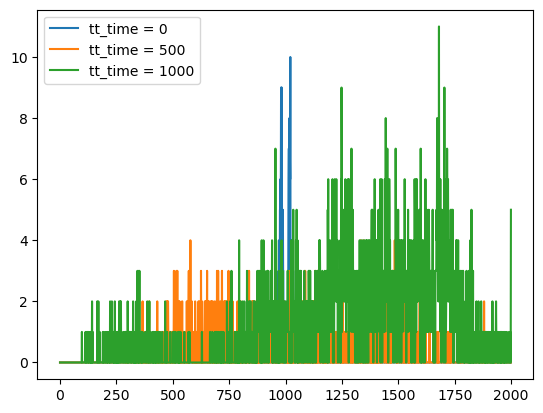

In [625]:
tt_time = len(frame_n)
half_time = int(tt_time/2)

plt.figure()
plt.plot(frame_n[0], label = f"tt_time = {0}")
plt.plot(frame_n[half_time], label = f"tt_time = {half_time}")
plt.plot(frame_n[tt_time-1], label = f"tt_time = {tt_time}")
plt.legend()
plt.show()

In [626]:
def most_infectious_loc(n):
    x_ind = np.argmax(n) 
    return x_ind

def prob_acquisition(n, params, sim_params):
    x_ind = most_infectious_loc(n)

    beta = params["beta"]
    ind_map = np.arange(0, 2*sim_params["xdomain"], dtype=int)
    dist = np.abs(ind_map - x_ind)
    prob = (nh+n)*np.exp(beta*dist)
    prob = prob/np.sum(prob)
    return prob

In [627]:
def immunity_acquisition_by_prob(nh, n, params, sim_params):
    prob = prob_acquisition(n, params, sim_params)
    Nh = params["Nh"]
    indices = np.arange(n.size)

    nh.fill(0)

    for i in range(Nh):
        index = np.random.choice(indices, p = prob)
        nh[index] += 1
    return nh

In [628]:
n = init_n(n, params, sim_params).astype(int)
nh = init_nh(nh, params, sim_params).astype(int)
f = np.zeros(2*sim_params["xdomain"])

In [629]:
time_range = sim_params["tf"]
frame_n = []
frame_nh = []
frame_f = []

for i in range(time_range):
    f = fitness(n, nh, params, sim_params)
    frame_f.append(f)

    n = virus_growth(n, f, params, sim_params)
    n = mutation(n, params, sim_params)
    frame_n.append(n)

    nh = immunity_acquisition_by_prob(nh, n, params, sim_params)
    frame_nh.append(nh)
    if np.sum(n) > sim_params["exp_ratio"]*np.sum(nh):
        break

    if np.sum(n) == 0:
        break

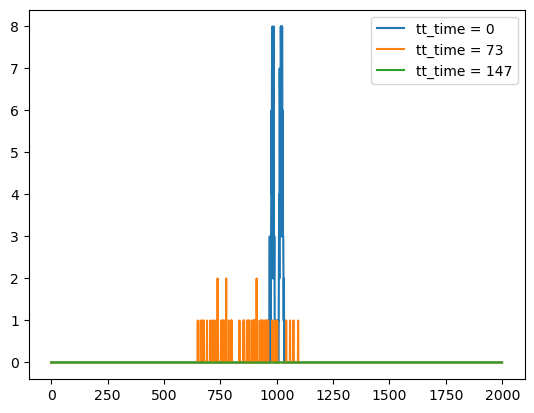

In [630]:
tt_time = len(frame_n)
half_time = int(tt_time/2)

plt.figure()
plt.plot(frame_n[0], label = f"tt_time = {0}")
plt.plot(frame_n[half_time], label = f"tt_time = {half_time}")
plt.plot(frame_n[tt_time-1], label = f"tt_time = {tt_time}")
plt.legend()
plt.show()

In [632]:
bacteria_lifetime_w_prob = []
bacteria_lifetime_no_prob = []
n = np.zeros(2*sim_params["xdomain"])
nh = np.zeros(2*sim_params["xdomain"])
f = np.zeros(2*sim_params["xdomain"])

for i in range(1000):
    n = init_n(n, params, sim_params).astype(int)
    nh = init_nh(nh, params, sim_params).astype(int)
    f = np.zeros(2*sim_params["xdomain"])

    for t in range(1000):
        f = fitness(n, nh, params, sim_params)

        n = virus_growth(n, f, params, sim_params)
        n = mutation(n, params, sim_params)

        nh = immunity_gain(nh, n)
        nh = immunity_loss(nh, n)
    
    bacteria_lifetime_no_prob.append(t)

    for t in range(1000):
        f = fitness(n, nh, params, sim_params)

        n = virus_growth(n, f, params, sim_params)
        n = mutation(n, params,     sim_params)

        nh = immunity_acquisition_by_prob(nh, n, params, sim_params)
    
    bacteria_lifetime_w_prob.append(t)


In [ ]:
plt.figure()
plt.title("Survival Time of Bacteria with Shared Information")
plt.plot(bacteria_lifetime_no_prob)
plt.plot(bacteria_lifetime_no_prob)